# ONLY USING STUDENTS WHO STARTED IN THE CS DEPARTMENT

### this notebook is just trying to set the framework for how to go about answering the question: if a student starts in major 'x', what major should they switch into to have the best chance of success?

### the goal was to make heatmaps to visualize the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### !!!!make sure you are using the right csv file!!! I did a little find/replace on the outcome202220.csv because all majors were 4 characters long except for ART and it was messing stuff up. should I have done that little clean up in here? yes. but I did not... you just need to create a function and run it when the major_history looks like 'CSCI BIOL NURS' or whatever majors are in there and have it find and replace ART with ARTT or any 4 character string denoting an art major

In [2]:
outcome = pd.read_csv('outcome202220_artt.csv', usecols = ['encrypt_id', 'department_bt', 'major_et','major_history','discontinued'])

### confirming there is 1 entry per student in the dataframe

In [3]:
len(pd.unique(outcome['encrypt_id']))

9361

In [4]:
outcome.info()
#the number of unique entries matches the number of entries, so this confirms each student has 1 entry. no duplicates exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9361 entries, 0 to 9360
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   encrypt_id     9361 non-null   int64 
 1   department_bt  9361 non-null   object
 2   major_et       9361 non-null   object
 3   major_history  9361 non-null   object
 4   discontinued   9361 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 365.8+ KB


### getting a list of the department codes, learning which majors are in the computer science department was done using google

In [5]:
pd.unique(outcome['department_bt'])

array(['EDST', 'KINE', 'ADMS', 'MUSC', 'COMM', 'FORS', 'HUSC', 'GBUS',
       'ACCT', 'PSYC', 'ARTT', 'CSCI', 'SWRK', 'EVSC', 'GOVT', 'MATH',
       'AGEN', 'MGMK', 'ENGL', 'HSEL', 'NURS', 'LANG', 'THTR', 'SOCI',
       'GEOL', 'DSCM', 'ECFI', 'MULT', 'BIOL', 'HIST', 'PHYS', 'DLAA',
       'CHEM', 'HUSR', 'DBUS', 'PPRO', 'SADV', 'ELEM'], dtype=object)

In [6]:
pd.unique(outcome['major_et'])
# 4 csci department majors: CSCI, CISY, ITEC, DATA (from what I found, might want to double check)

array(['DINS', 'KINE', 'CONC', 'MUSC', 'GCOM', 'FORS', 'INDS', 'INST',
       'DHUS', 'GBUS', 'ACCT', 'PSYC', 'ARTT', 'CSCI', 'SWRK', 'EVSC',
       'CJUS', 'MATH', 'AGEN', 'INTB', 'ENGL', 'COMD', 'PSCI', 'NURS',
       'COMS', 'THTR', 'GEOG', 'GEOL', 'RNUR', 'HSCI', 'MGMT', 'TRAN',
       'FINC', 'SPBM', 'SPSC', 'APAS', 'BIOL', 'MKTG', 'HIST', 'DNSC',
       'DFHH', 'CISY', 'ECON', 'HUSC', 'DGBU', 'BCCE', 'HADM', 'PHYS',
       'MRCH', 'LSTU', 'SOCI', 'RHBS', 'ENPH', 'BIOC', 'CHEM', 'MGHR',
       'CWRI', 'ITEC', 'ENTR', 'BECO', 'FNTD', 'CCMG', 'DBCC', 'DATA',
       'FRWM', 'HUSR', 'BANK', 'FRMG', 'MDST', 'PBAD', 'LANG', 'DANC',
       'AGET', 'PUND', 'AGAS', 'SUDE', 'PACC', 'MEHU', 'CJCR', 'PHIL',
       'AGBS', 'UNDD', 'AGDV', 'IICM', 'ARTTH', 'POSC', 'CJLE', 'HUAP'],
      dtype=object)

In [7]:
#CONSTANTS
csMajorList = ('CSCI', 'CISY', 'ITEC', 'DATA')

## 1. Cleaning major_history feature

In [8]:
#testing so i know cleanMajorHistory is doing what I want it to
hist = 'UNDD (201910)|DINS (202025)'
numMaj = int((len(hist)) / 13)
newHist = ''
for i in range(numMaj):
    start = i * 14
    end = start + 4
    newHist += hist[start:end] + " "
print(newHist)


UNDD DINS 


In [9]:
def cleanMajorHistory(row):
    hist = row[0] #extract string from dataframe containing major_history
    numMaj = int((len(hist)) / 13) #determine how many majors are listed in the string
    newHist = '' #initialize a blank string to add to later
    
    #for each major a student has listed
    for i in range(numMaj):
        #extract just the 4 character code, ignore the rest
        start = i * 14
        end = start + 4
        newHist += hist[start:end] + " "
        
        
    return newHist

In [10]:
#testing to make sure codeMajors is doing what I want it to
ma = 'UNDD DINS'
numMaj = int((len(ma)) / 4)
codedList = ''

for i in range(numMaj):
    start = i * 5
    end = start + 4
    m = ma[start:end]
    print(m)
    
    #this is super inefficient, whoops. probably should make a dictionary to map majors to indices
    if m in csMajorList:
        if m == 'CSCI':
            codedList += '0'
        if m == 'ITEC':
            codedList +=  '1'
        if m == 'CISY':
            codedList += '2'
        if m == 'DATA':
            codedList += '3'
        if m == 'DINS':
            codedList += '4'
        
    else:
        codedList += '5'

print(codedList)


UNDD
DINS
55


In [11]:
def codeMajors(row):
    majors = row[0] #extract the list of 4 character majors a student has had
    numMaj = int((len(majors))/4) #determine how many majors are in the string
    codedList = '' #initialize an empty string to add to later

    #for each major a student has had
    for i in range(numMaj):
        #extract a single 4 character major
        start = i * 5
        end = start + 4
        m = majors[start:end]
   
        #convert it to a digit/code (which will be used as the index of the matrix later)
        if m in csMajorList:
            if m == 'CSCI':
                codedList += '0'
            if m == 'ITEC':
                codedList +=  '1'
            if m == 'CISY':
                codedList += '2'
            if m == 'DATA':
                codedList += '3'
        
        else:
            codedList += '4'
            
    return codedList

        

In [12]:
#get the data to be cleaned
students = outcome[['major_history', 'discontinued', 'department_bt']]
students = students[students['department_bt'] == 'CSCI'] #only taking students currently in cs department
students = students[['major_history','discontinued']]
students.head(15)


,major_history,discontinued
22,CSCI (201010),1
73,DINS (202210),0
105,CSCI (201010),0
118,CISY (202210),0
121,CSCI (201810),1
196,CSCI (201810),1
228,CSCI (202010),1
246,CSCI (202210),0
309,ITEC (202010),0
343,CSCI (202010),0


In [13]:
#apply all cleaning on the dataframe:

#only take students who are currently in the CSCI department
students = outcome[['major_history', 'discontinued', 'department_bt']]
students = students[students['department_bt'] == 'CSCI']
students = students[['major_history','discontinued']]

#removes the term codes, parenthesis, and |
students['major_history'] = students.apply(cleanMajorHistory, axis = 1)

#changes 4 character majors into digit codes
students['major_history'] = students.apply(codeMajors, axis = 1)

#keep only the entries where the student changed their major
students = students[students['major_history'].str.len() > 1] 


students.head()

,major_history,discontinued
418,443,0
588,440,0
613,43,1
699,41,0
740,21,0


In [14]:
cleaned = students.copy() #there are 93 students in this table
#this means there were 93 students in spring 2022 that were currently in the 
#    CSCI department and had switched their major at some point
#    this seems reasonable to me
cleaned.head()

,major_history,discontinued
418,443,0
588,440,0
613,43,1
699,41,0
740,21,0


## 2) Turning coded history into counts of good/total switches

In [27]:
total = np.zeros(25)
total = total.reshape((5,5))
total = pd.DataFrame(total)

good = total.copy()
total
#creates 2 dataframes which will hold the counts for 

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


0 = CSCI,
1 = ITEC,
2 = CISY,
3 = DATA,
4 = other,
5 = total

rows: starting major
columns: new major

(2,3) is a CISY student who switched to DATA

(4,0) is a student with a non-CSCI major who switched into CSCI

In [28]:
major = '023'
#total table should have ++ in cells [0,2] and [2,3]
#good table should have ++ in cell [2,3] (but should it be [0,3] since that's what they started as?? seems opiniated idk)

num = len(major)
for i in range(num - 1):
    og = int(major[i:i+1]) #get the digit of the original (og) major
    new = int(major[i+1:i+2]) #get the digit of the major the student switched into (new)
    
    total.iloc[og, new] += 1
    
total
    


,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [29]:
#this won't alter the cleaned df
#it uses the cleaned df to update the total df
def countTotal(row):
    majors = row[0]
    #go through each pair of majors in the string (og major and new major)
    for i in range(len(majors) - 1):
        og = int(majors[i:i+1]) #get the digit of the original (og) major
        new = int(majors[i+1:i+2]) #get the digit of the major the student switched into (new)
    
        total.iloc[og, new] += 1
        
    return majors
        

In [30]:
def countGood(row):
    majors = row[0]
    disc = row[1]
    #if the student is continuing in their current major
    if disc == 0:
        num = len(majors)
        last = int(majors[num-2:num-1]) #last major held before switching
        cur = int(majors[num-1:]) #current major
        good.iloc[last,cur] += 1 #increment that cell in the good table
    
    return majors
        

In [31]:
#create 2 matrices to hold counts of total major switches 
#    and good (meaning the student switched into a major and did not discontinue) major switches

z = np.zeros((6,6), dtype = int)
global total
total = pd.DataFrame(z) #make it global so that the countTotal function can access it and update it
#total = total.rename(index = {0:'CSCI', 1:'ITEC', 2:'CISY', 3:'other', 4:'total'})
global good 
good = total.copy() #make it global so that the countGood function can access it and update it

#count total number of major switches from each student entry
cleaned.apply(countTotal, axis = 1)

#count total number of successful major switches from each student
cleaned.apply(countGood, axis = 1)

#compute values for the 'total' columns/rows
total[5] = total.sum(axis = 1)
total.loc[5, :] = total.sum(axis = 0)

good[5] = good.sum(axis = 1)
good.loc[5, :] = good.sum(axis = 0)



In [32]:
total

,0,1,2,3,4,5
0,0,19,8,0,7,34
1,1,0,2,0,5,8
2,0,10,0,1,2,13
3,1,1,0,0,1,3
4,33,14,9,6,28,90
5,35,44,19,7,43,148


In [33]:
good

,0,1,2,3,4,5
0,0,12,4,0,4,20
1,0,0,2,0,4,6
2,0,7,0,1,1,9
3,1,1,0,0,1,3
4,16,7,3,3,2,31
5,17,27,9,4,12,69


In [34]:
perc = good / total
perc.replace(np.nan, 0, inplace = True)
dic = {0:'CSCI', 1:'ITEC', 2:'CISY', 3:'DATA', 4:'other', 5:'total'}
perc.rename(columns = dic, index = dic, inplace = True)
perc

,CSCI,ITEC,CISY,DATA,other,total
CSCI,0.000000,0.631579,0.500000,0.000000,0.571429,0.588235
ITEC,0.000000,0.000000,1.000000,0.000000,0.800000,0.750000
CISY,0.000000,0.700000,0.000000,1.000000,0.500000,0.692308
DATA,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
other,0.484848,0.500000,0.333333,0.500000,0.071429,0.344444
total,0.485714,0.613636,0.473684,0.571429,0.279070,0.466216


,CSCI,ITEC,CISY,DATA,other
CSCI,0.000000,0.631579,0.500000,0.0,0.571429
ITEC,0.000000,0.000000,1.000000,0.0,0.800000
CISY,0.000000,0.700000,0.000000,1.0,0.500000
DATA,1.000000,1.000000,0.000000,0.0,1.000000
other,0.484848,0.500000,0.333333,0.5,0.071429


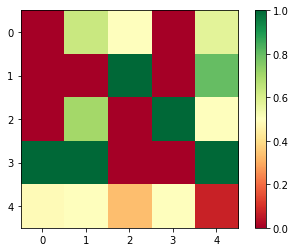

In [35]:
data = perc.iloc[:5, :5]
g = plt.imshow(data, cmap = 'RdYlGn')

plt.colorbar(g)
data

Example readings: the success rate of CSCI students switching into ITEC is 63%

the success rate of students not in the CS department and switching into CISY is 33%